In [2]:
import numpy as np      # linear algebra
import pandas as pd     # data processing
from matplotlib import pyplot as plt
import re
from string import punctuation, digits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
sms = pd.read_csv('smsturkish.csv',encoding='utf-8')
print(sms.shape)
pd.set_option('max_colwidth', 800)
sms = sms.iloc[:-1]
sms

(851, 8)


,Spam,V1,F3,F4,F5,F6,F7,F8
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """,NaN,NaN,NaN,NaN,NaN,NaN
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,NaN,NaN,NaN,NaN,NaN,NaN
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,NaN,NaN,NaN,NaN,NaN,
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM",NaN,NaN,NaN,NaN,NaN,NaN
4,Ham,nerdesin la,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin,NaN,NaN,NaN,NaN,NaN,NaN
846,Ham,Canım ya kantine gelebilir misin,NaN,NaN,NaN,NaN,NaN,NaN
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir.",NaN,NaN,NaN,NaN,NaN,NaN
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir.",NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
sms.drop(columns=['F3', 'F4', 'F5','F6','F7','F8'],inplace=True)
sms.rename(columns= {'Spam':'label','V1':'message'},inplace=True)
sms

,label,message
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM"
4,Ham,nerdesin la
...,...,...
845,Spam,Kamu 1000 paketine gecerek ayda sadece 45TLye heryonle 1000dk ve 1000smse sahip olabilirsiniz.Bu muhtesem paket icin hemen KAMU yazip 2222ye gonderin
846,Ham,Canım ya kantine gelebilir misin
847,Ham,"**5992 nolu Kredi Karti Ekstre Borcunuz 1,119.25 TL Asgari Odeme Tutari 247.00 TL ve Son Odeme Tarihi 05.07.2011 dir."
848,Ham,"18/03'de kesilecek, son 4 hanesi 5403 olan kartiniza ait ekstrenize yansiyacak tutar 1132.67 TL 'ye ulasmistir. Kullanilabilir limitiniz 1423.03 TL 'dir."


In [5]:
smsBig = pd.read_csv('TurkishSMSCollection.csv',encoding='utf-8',sep=";")
print(smsBig.shape)
pd.set_option('max_colwidth', 800)
smsBig

(4751, 2)


,GroupText,Message
0,Normal,125 lira
1,Normal,Baskanin aksam toplantısi fenaymis :)
2,Normal,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Normal,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [6]:
smsBig.rename(columns= {'GroupText':'label','Message':'message'},inplace=True)
smsBig

,label,message
0,Normal,125 lira
1,Normal,Baskanin aksam toplantısi fenaymis :)
2,Normal,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Normal,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [7]:
smsBig['label'] = smsBig['label'].map( {'Normal': 'Ham', 'Spam': 'Spam'} )
smsBig

,label,message
0,Ham,125 lira
1,Ham,Baskanin aksam toplantısi fenaymis :)
2,Ham,Bilal yalçnlara ne zaman gidiyoruz?
3,Spam,"BiP ile mesajlarimi aninda, daha eglenceli gonderiyorum! Sen de hemen kullan! http://mobiltr.co/BiP"
4,Spam,DIGITURKTEN FIRSAT! SiZE OZEL YIL SONUNA KADAR 200 UZERi ULUSAL HD YAYIN BELGESEL+SPOR+DiZi+YETiSKiN iLK AY LiG TV AYDA SADECE 10 TL.HEMEN ARAYIN 02122129070
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [8]:
dataset = pd.concat([sms,smsBig], axis=0)
dataset

,label,message
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM"
4,Ham,nerdesin la
...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g"


In [9]:
dataset.label.value_counts()

Spam    2956
Ham     2645
Name: label, dtype: int64

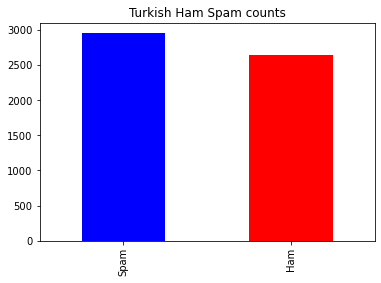

In [10]:
dataset.label.value_counts().plot(kind = 'bar', color = ['blue','red'])
plt.title('Turkish Ham Spam counts')
plt.show()

<AxesSubplot:ylabel='label'>

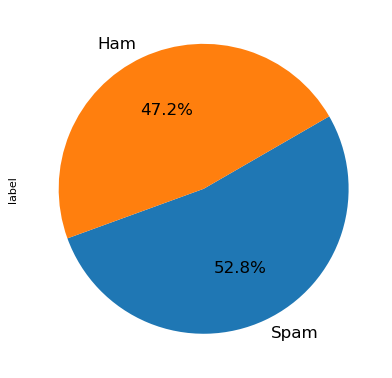

In [11]:
fig = plt.figure(figsize=(6,6), dpi=80)
ax = plt.subplot(111)

dataset.label.value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=200, fontsize=15)

In [12]:
# Transform message into lowercase
dataset["lowerCaseMessage"] = dataset["message"].str.lower()
dataset

,label,message,lowerCaseMessage
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere ""","""mudo outletlere once gelen kazaniyor_ mobilya basta olmak uzere """
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,yeni turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.ihtiyaciniza gore sadece 15tlye gunluk 30dk yada 49tlye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,cadde üzerinde yeni site c blok no 3 zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM","gnctrkcllli, bonnyfood'dan lezzetli cicekler firsati. tum urunlerde gecerli 25 .tllik hediye ceki 1 tl! bonny yaz 8073'e gonder. sms ucreti 50krs. gncteklif.com"
4,Ham,nerdesin la,nerdesin la
...,...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970","ziraat kartiniza ozel, lezzetlihediye.com dan yapacaginiz 75 tl ve uzeri harcamaniza aninda %25 indirim! detayli bilgi icin http://bit.ly/1nqcdjy sms istemiyorsaniz sms iptal yazip 4757'ye gonderin.mersis:6292228721472970"
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.,ziraat maximum'dan yeniyila ozel 100 tl'ye kadar maxipuan! kampanyaya katilmak icin yeniyil bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. kampanya detayi icin http://bit.ly/1y8ep8g linkini tiklayin.
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş,zor olur sonra. evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g","zorlu hava şartlarında elektriksiz kalma! attlas firman 3800 4 zamanlı 3,8 kva jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1ixbp9g"


In [13]:
# Remove http, www, .com, email adress, link, punctuation and digit

def preProcessing(text):
    return removePunc(removeDigits(removeEmail(remove_com_tr(removeLink(text)))))

def removeLink(text):
    return re.sub(r"((http\S+)|(www\S+))", "", str(text))

def remove_com_tr(text):
    text = re.sub(r'\S*\.(com|tr)',"",str(text))
    return text

def removeEmail(text):
    return re.sub(r'([.\w]{3,}@[.\w]{5,})', '', str(text))

def removeDigits(text):
    text = text.strip()  #removing whitespaces from text
    remove_digits = str.maketrans('', '', digits)
    return text.translate(remove_digits)

def removePunc(text):
    regex = re.compile('[%s]' % re.escape(punctuation))
    return regex.sub('', text)

In [14]:
dataset["cleanedMessage"] = dataset['lowerCaseMessage'].map(preProcessing)
dataset

,label,message,lowerCaseMessage,cleanedMessage
0,Spam,"""Mudo Outletlere once gelen kazaniyor_ Mobilya basta olmak uzere ""","""mudo outletlere once gelen kazaniyor_ mobilya basta olmak uzere """,mudo outletlere once gelen kazaniyor mobilya basta olmak uzere
1,Spam,Yeni Turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.Ihtiyaciniza gore sadece 15TLye gunluk 30dk yada 49TLye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,yeni turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsiniz.ihtiyaciniza gore sadece 15tlye gunluk 30dk yada 49tlye 1ay boyunca 90dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin.4440532,yeni turkcell avantaj paketleriyle yurtdisinda da rahat rahat konusabilirsinizihtiyaciniza gore sadece tlye gunluk dk yada tlye ay boyunca dklik konusma paketlerinden size uygun olani almak icin yurtdisina cikmadan mutlaka arayin
2,Ham,Cadde üzerinde Yeni site C blok no 3 zilde gokcer ozan tuna yaziyo,cadde üzerinde yeni site c blok no 3 zilde gokcer ozan tuna yaziyo,cadde üzerinde yeni site c blok no zilde gokcer ozan tuna yaziyo
3,Spam,"gnctrkcllli, Bonnyfood'dan lezzetli cicekler firsati. Tum urunlerde gecerli 25 .TLlik hediye ceki 1 TL! BONNY yaz 8073'e gonder. SMS ucreti 50krs. GNCTEKLIF.COM","gnctrkcllli, bonnyfood'dan lezzetli cicekler firsati. tum urunlerde gecerli 25 .tllik hediye ceki 1 tl! bonny yaz 8073'e gonder. sms ucreti 50krs. gncteklif.com",gnctrkcllli bonnyfooddan lezzetli cicekler firsati tum urunlerde gecerli tllik hediye ceki tl bonny yaz e gonder sms ucreti krs
4,Ham,nerdesin la,nerdesin la,nerdesin la
...,...,...,...,...
4746,Spam,"Ziraat Kartiniza ozel, Lezzetlihediye.com dan yapacaginiz 75 TL ve uzeri harcamaniza aninda %25 indirim! Detayli bilgi icin http://bit.ly/1nQCDJy SMS istemiyorsaniz SMS IPTAL yazip 4757'ye gonderin.Mersis:6292228721472970","ziraat kartiniza ozel, lezzetlihediye.com dan yapacaginiz 75 tl ve uzeri harcamaniza aninda %25 indirim! detayli bilgi icin http://bit.ly/1nqcdjy sms istemiyorsaniz sms iptal yazip 4757'ye gonderin.mersis:6292228721472970",ziraat kartiniza ozel dan yapacaginiz tl ve uzeri harcamaniza aninda indirim detayli bilgi icin sms istemiyorsaniz sms iptal yazip ye gonderinmersis
4747,Spam,Ziraat Maximum'dan Yeniyila ozel 100 TL'ye kadar MaxiPuan! Kampanyaya katilmak icin YENIYIL bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. Kampanya detayi icin http://bit.ly/1Y8ep8G linkini tiklayin.,ziraat maximum'dan yeniyila ozel 100 tl'ye kadar maxipuan! kampanyaya katilmak icin yeniyil bosluk kartinizin son 6 hanesini 4757'ye ucretsiz gonderebilirsiniz. kampanya detayi icin http://bit.ly/1y8ep8g linkini tiklayin.,ziraat maximumdan yeniyila ozel tlye kadar maxipuan kampanyaya katilmak icin yeniyil bosluk kartinizin son hanesini ye ucretsiz gonderebilirsiniz kampanya detayi icin linkini tiklayin
4748,Ham,Zor olur sonra. Evet evet boş bol yürüyüş,zor olur sonra. evet evet boş bol yürüyüş,zor olur sonra evet evet boş bol yürüyüş
4749,Spam,"Zorlu hava şartlarında elektriksiz kalma! Attlas Firman 3800 4 Zamanlı 3,8 KVA Jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1IxBp9g","zorlu hava şartlarında elektriksiz kalma! attlas firman 3800 4 zamanlı 3,8 kva jeneratör %10 indirimli, üstelik süper hızlı gönderi! http://bit.ly/1ixbp9g",zorlu hava şartlarında elektriksiz kalma attlas firman zamanlı kva jeneratör indirimli üstelik süper hızlı gönderi


In [15]:
#Create Train Test Split
X = dataset["cleanedMessage"]

y = dataset['label'].map( {'Spam': 1, 'Ham': 0} )

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)

In [14]:
# K-Neighbors Classifier
kneighbors = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
kneighbors.fit(X_train, y_train)

print("Training Accuracy:", kneighbors.score(X_train, y_train))

predict_knn = kneighbors.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_knn))
print('Precision score: ', precision_score(y_test, predict_knn, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_knn, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_knn, average='weighted'))

Training Accuracy: 0.7948660714285715

Testing Accuracy: 0.6975914362176628
Precision score:  0.7482091491593632
Recall score:     0.6975914362176628
F1 score:         0.6726613190371639


In [17]:
#cross validation for KNN
fbeta_scorer = make_scorer(fbeta_score, beta = 0.5)

def validation_score(model_name):
    scores = cross_val_score(model_name, X_train, y_train, cv=10, scoring=fbeta_scorer) 
    return scores

kneighbors_val_score = validation_score(kneighbors)
print(kneighbors_val_score, "\n")
print("Average cross-validation F-beta score:", kneighbors_val_score.mean())

[0.72535211 0.74305556 0.67987805 0.6779661  0.66527446 0.69444444
 0.68761668 0.6900801  0.70356473 0.67559343] 

Average cross-validation F-beta score: 0.6942825656392972


In [18]:
# Random Forest
randFor = RandomForestClassifier()
randFor.fit(X_train, y_train)

print("Training Accuracy:", randFor.score(X_train, y_train))

predict_rf = randFor.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_rf))
print('Precision score: ', precision_score(y_test, predict_rf, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_rf, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_rf, average='weighted'))

Training Accuracy: 0.9993303571428571

Testing Accuracy: 0.9393398751115076
Precision score:  0.9422671696181644
Recall score:     0.9393398751115076
F1 score:         0.9390417851927321


In [19]:
#cross validation for Random Forest
randFor_val_score = validation_score(randFor)
print(randFor_val_score, "\n")
print("Average cross-validation F-beta score:", randFor_val_score.mean())

[0.9        0.8836858  0.9148265  0.90801887 0.90450311 0.86397059
 0.91192518 0.87528174 0.90695856 0.90370955] 

Average cross-validation F-beta score: 0.8972879890691855


In [20]:
# Logistic Regression
logReg = LogisticRegression()
logReg.fit(X_train, y_train)

print("Training Accuracy:", logReg.score(X_train, y_train))

predict_lg = logReg.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_lg))
print('Precision score: ', precision_score(y_test, predict_lg, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_lg, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_lg, average='weighted'))

Training Accuracy: 0.9957589285714286

Testing Accuracy: 0.9803746654772525
Precision score:  0.9807096029415266
Recall score:     0.9803746654772525
F1 score:         0.980388925159671


In [21]:
#cross validation for Logistic Regression
logReg_val_score = validation_score(logReg)
print(logReg_val_score, "\n")
print("Average cross-validation F-beta score:", logReg_val_score.mean())

[0.99137931 0.98886986 0.98275862 0.98684211 0.98660714 0.99829352
 0.98701299 0.99300087 0.995671   0.97835498] 

Average cross-validation F-beta score: 0.9888790393456445


In [22]:
#fitting a Multinomial Naive Bayes Classifier Model 
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

print("Training Accuracy:", naive_bayes.score(X_train, y_train))

predict_nb = naive_bayes.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_nb))
print('Precision score: ', precision_score(y_test, predict_nb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_nb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_nb, average='weighted'))

Training Accuracy: 0.9928571428571429

Testing Accuracy: 0.9741302408563782
Precision score:  0.9751570791760472
Recall score:     0.9741302408563782
F1 score:         0.974070790917869


In [23]:
#cross validation for Naive Bayes
naive_bayes_val_score = validation_score(naive_bayes)
print(naive_bayes_val_score, "\n")
print("Average cross-validation F-beta score:", naive_bayes_val_score.mean())

[0.97268212 0.97734899 0.98728814 0.97457627 0.9839527  0.97408027
 0.97633136 0.98388465 0.98901099 0.96747289] 

Average cross-validation F-beta score: 0.97866283815777


In [24]:
#Support Vector Machine with linear kernel
svc = SVC(kernel = 'linear', C = 1.0)
svc.fit(X_train, y_train)

print("Training Accuracy:", svc.score(X_train, y_train))

predict_svm = svc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_svm))
print('Precision score: ', precision_score(y_test, predict_svm, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_svm, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_svm, average='weighted'))

Training Accuracy: 0.9975446428571428

Testing Accuracy: 0.9857270294380018
Precision score:  0.9859717936410287
Recall score:     0.9857270294380018
F1 score:         0.9857361940348974


In [25]:
#cross validation for Support Vector Machine
svc_val_score = validation_score(svc)
print(svc_val_score, "\n")
print("Average cross-validation F-beta score:", svc_val_score.mean())

[0.99315068 0.99315068 0.98275862 0.98958333 0.98754448 0.99829352
 0.99312124 0.99389712 0.99389712 0.97835498] 

Average cross-validation F-beta score: 0.9903751785620998


In [26]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

print("Training Accuracy:", dtc.score(X_train, y_train))

predict_dtc = dtc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_dtc))
print('Precision score: ', precision_score(y_test, predict_dtc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_dtc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_dtc, average='weighted'))

Training Accuracy: 0.9227678571428571

Testing Accuracy: 0.9072256913470116
Precision score:  0.9129408419251299
Recall score:     0.9072256913470116
F1 score:         0.9073035231340588


In [27]:
#cross validation for Decision Tree
dtc_val_score = validation_score(dtc)
print(dtc_val_score, "\n")
print("Average cross-validation F-beta score:", dtc_val_score.mean())

[0.94795539 0.94765343 0.94874101 0.95973783 0.96117424 0.9397482
 0.95458758 0.94439118 0.9475621  0.9255814 ] 

Average cross-validation F-beta score: 0.9477132351959202


In [28]:
#Ada Boost Classifier
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
abc.fit(X_train, y_train)

print("Training Accuracy:", abc.score(X_train, y_train))

predict_abc = abc.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_abc))
print('Precision score: ', precision_score(y_test, predict_abc, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_abc, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_abc, average='weighted'))

Training Accuracy: 0.9752232142857142

Testing Accuracy: 0.9634255129348795
Precision score:  0.9643123898395117
Recall score:     0.9634255129348795
F1 score:         0.9634630939092992


In [29]:
#cross validation for Ada Boost Classifier
abc_val_score = validation_score(abc)
print(abc_val_score, "\n")
print("Average cross-validation F-beta score:", abc_val_score.mean())

[0.98339161 0.96938776 0.98432056 0.96830986 0.98524306 0.98090278
 0.98114824 0.97951915 0.98517873 0.96816976] 

Average cross-validation F-beta score: 0.9785571490366589


In [30]:
# XGBoost Classifier
xgb = XGBClassifier(n_estimators=50,random_state=2, use_label_encoder=False, eval_metric='rmse')
xgb.fit(X_train, y_train)

print("Training Accuracy:", xgb.score(X_train, y_train))

predict_xgb = xgb.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_xgb))
print('Precision score: ', precision_score(y_test, predict_xgb, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_xgb, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_xgb, average='weighted'))

Training Accuracy: 0.9814732142857143

Testing Accuracy: 0.9607493309545049
Precision score:  0.9611066161729962
Recall score:     0.9607493309545049
F1 score:         0.9607778503193416


In [31]:
#cross validation for XGBoost Classifier
xgb_val_score = validation_score(xgb)
print(xgb_val_score, "\n")
print("Average cross-validation F-beta score:", xgb_val_score.mean())

[0.98615917 0.96938776 0.97508591 0.97711268 0.98151408 0.97128378
 0.97592433 0.9833187  0.97446809 0.96575944] 

Average cross-validation F-beta score: 0.9760013937096804


In [32]:
# Stochastic Gradient Descent Classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

print("Training Accuracy:", sgd.score(X_train, y_train))

predict_sgd = sgd.predict(X_test)

print('\nTesting Accuracy:', accuracy_score(y_test, predict_sgd))
print('Precision score: ', precision_score(y_test, predict_sgd, average='weighted'))
print('Recall score:    ', recall_score(y_test, predict_sgd, average='weighted'))
print('F1 score:        ', f1_score(y_test, predict_sgd, average='weighted'))

Training Accuracy: 0.9973214285714286

Testing Accuracy: 0.9848349687778769
Precision score:  0.9849775566560192
Recall score:     0.9848349687778769
F1 score:         0.984842601323004


In [33]:
#cross validation for Stochastic Gradient Descent
sgd_val_score = validation_score(sgd)
print(sgd_val_score, "\n")
print("Average cross-validation F-beta score:", sgd_val_score.mean())

[0.99315068 0.98886986 0.98639456 0.98524306 0.98684211 0.99489796
 0.99223469 0.99742046 0.99654875 0.98022356] 

Average cross-validation F-beta score: 0.9901825683841212


In [16]:
#for fitting the model
X_train = X_train.toarray()
X_test = X_test.toarray()

In [35]:
#Initialising ANN
ann = Sequential()
 #Adding First Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
history = ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs = 50)

Epoch 1/50
140/140 [==============================] - 1s 4ms/step - loss: 0.5961 - accuracy: 0.8996 - val_loss: 0.4115 - val_accuracy: 0.9777
Epoch 2/50
140/140 [==============================] - 0s 3ms/step - loss: 0.2390 - accuracy: 0.9857 - val_loss: 0.1392 - val_accuracy: 0.9857
Epoch 3/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0791 - accuracy: 0.9946 - val_loss: 0.0722 - val_accuracy: 0.9848
Epoch 4/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9958 - val_loss: 0.0542 - val_accuracy: 0.9831
Epoch 5/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9958 - val_loss: 0.0450 - val_accuracy: 0.9839
Epoch 6/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0199 - accuracy: 0.9960 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 7/50
140/140 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.9962 - val_loss: 0.0366 - val_accuracy: 0.9875
Epoch 

In [36]:
loss, accuracy = ann.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = ann.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9993
Training Loss: 0.0016
Testing Accuracy:  0.9563
Testing Loss:  0.1138


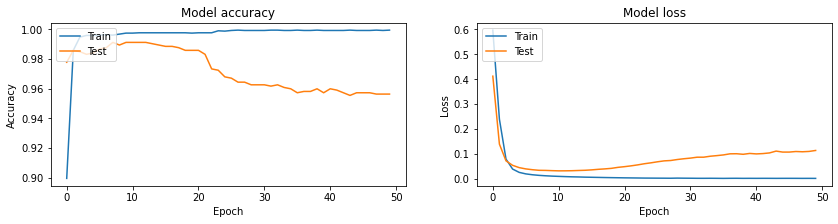

In [37]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [40]:
# create the CNN model
cnn = Sequential()
cnn.add(Embedding(1000, 64, input_length=12584))
cnn.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
cnn.add(MaxPooling1D(pool_size=2))
cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 12584, 64)         64000     
                                                                 
 conv1d_3 (Conv1D)           (None, 12584, 128)        32896     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 6292, 128)        0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 6292, 64)          32832     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 3146, 64)         0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 3146, 32)         

In [41]:
# Fit the model
history = cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 117s 1s/step - loss: 0.3699 - accuracy: 0.7893 - val_loss: 0.0775 - val_accuracy: 0.9799
Epoch 2/50
112/112 [==============================] - 115s 1s/step - loss: 0.0375 - accuracy: 0.9897 - val_loss: 0.0697 - val_accuracy: 0.9821
Epoch 3/50
112/112 [==============================] - 114s 1s/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0775 - val_accuracy: 0.9844
Epoch 4/50
112/112 [==============================] - 115s 1s/step - loss: 0.0137 - accuracy: 0.9969 - val_loss: 0.0802 - val_accuracy: 0.9799
Epoch 5/50
112/112 [==============================] - 117s 1s/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0807 - val_accuracy: 0.9810
Epoch 6/50
112/112 [==============================] - 115s 1s/step - loss: 0.0051 - accuracy: 0.9978 - val_loss: 0.0861 - val_accuracy: 0.9799
Epoch 7/50
112/112 [==============================] - 115s 1s/step - loss: 0.0041 - accuracy: 0.9975 - val_loss: 0.0947 - val_accuracy: 0.9721

In [42]:
loss, accuracy = cnn.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = cnn.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

Training Accuracy: 0.9942
Training Loss: 0.0295
Testing Accuracy:  0.9572
Testing Loss:  0.2533


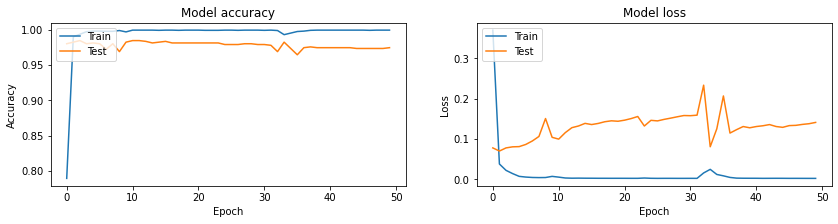

In [43]:
# Plot training & validation accuracy values
plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [19]:
# Create the LSTM Model
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=64, input_length=12584))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 12584, 64)         64000     
                                                                 
 lstm_1 (LSTM)               (None, 100)               66000     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 130,101
Trainable params: 130,101
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
112/112 [==============================] - 2929s 26s/step - loss: 0.6928 - accuracy: 0.5140 - val_loss: 0.6908 - val_accuracy: 0.5357
Epoch 2/50
112/112 [==============================] - 3299s 29s/step - loss: 0.6925 - accuracy: 0.5234 - val_loss: 0.6908 - val_accuracy: 0.5357
Epoch 3/50
112/112 [==============================] - 5532s 50s/step - loss: 0.6926 - accuracy: 0.5234 - val_loss: 0.6911 - val_accuracy: 0.5357
Epoch 4/50
112/112 [==============================] - 34365s 309s/step - loss: 0.6922 - accuracy: 0.5237 - val_loss: 0.6914 - val_accuracy: 0.5357
Epoch 5/50
 33/112 [=======>......................] - ETA: 40:30 - loss: 0.6938 - accuracy: 0.4972

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
print("Training Loss: {:.4f}".format(loss))

loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
print("Testing Loss:  {:.4f}".format(loss))

In [ ]:
# Plot training & validation accuracy values

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()